## **IRIS Flower Classification**

In [116]:
#Importing all necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


In [117]:
#Importing the dataset
iris_dataset=pd.read_csv("/content/IRIS Flower.csv")

In [118]:
#Viewing the first 5 rows in the dataset
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [119]:
#Knowing the shape
iris_dataset.shape

(150, 5)

In [120]:
#Dataset Information
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [121]:
#Describe the dataset
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [122]:
#Checking the null values
iris_dataset.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [123]:
#checking the duplicate values
iris_dataset[iris_dataset.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [124]:
#Removing the Duplicate Values
iris_dataset.drop_duplicates(inplace=True)

In [125]:
iris_dataset.shape

(147, 5)

In [126]:
#Count of each species
species_counts = iris_dataset['species'].value_counts()
species_counts

,count
species,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


In [127]:
#Species Names
labels=species_counts.index
labels

Index(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype='object', name='species')

## **Analysing the visualisations of the dataset**

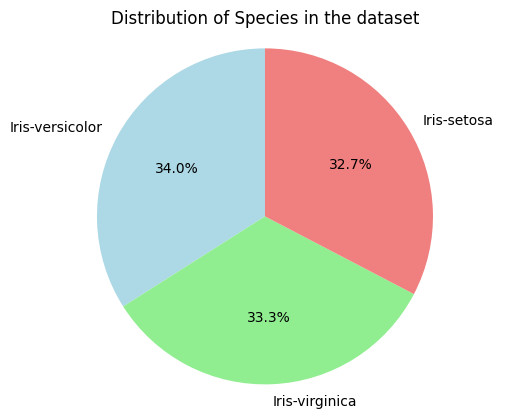

In [128]:
# Get the counts of each species
species_counts = iris_dataset['species'].value_counts()

# Plot a pie chart
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])

# Add a title
plt.title('Distribution of Species in the dataset')

# Ensure the pie chart is a circle
plt.axis('equal')

# Show the plot
plt.show()


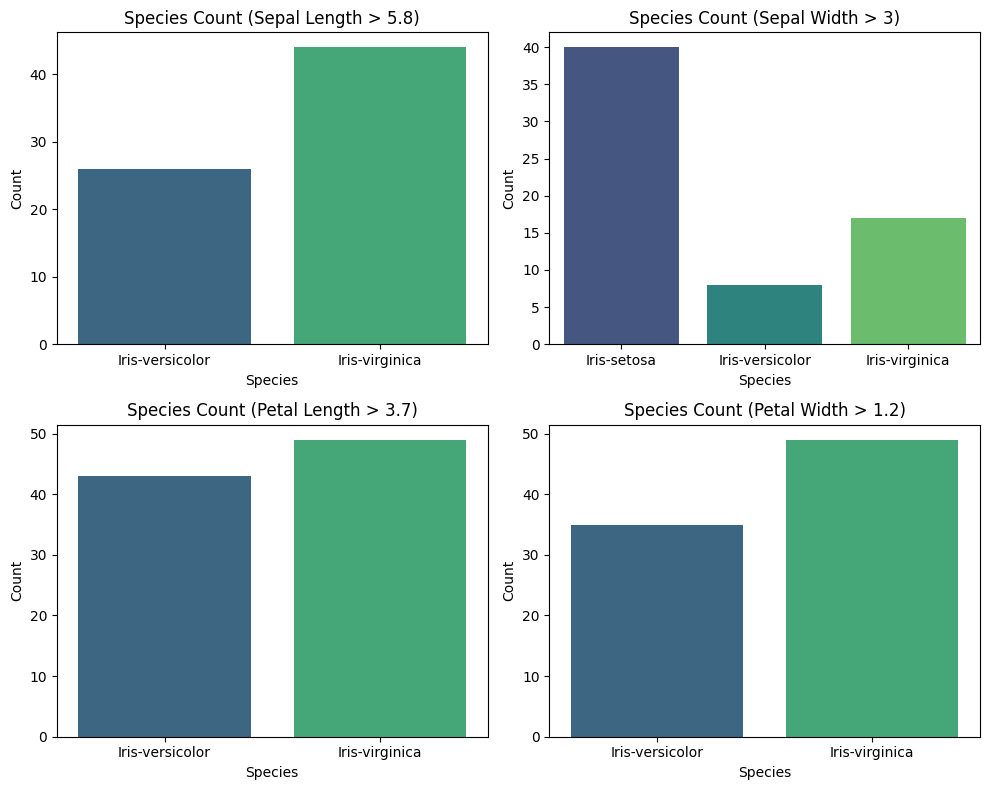

In [129]:
# Create a figure and axes for 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Filter rows where sepal length is greater than 5.8
filtered_df = iris_dataset[iris_dataset['sepal_length'] > 5.8]
species_count = filtered_df.groupby('species').size()
sns.barplot(x=species_count.index, y=species_count.values, palette='viridis', ax=axs[0, 0])
axs[0, 0].set_xlabel('Species')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_title('Species Count (Sepal Length > 5.8)')

# Filter rows where sepal width is greater than 3
filtered_df = iris_dataset[iris_dataset['sepal_width'] > 3]
species_count = filtered_df.groupby('species').size()
sns.barplot(x=species_count.index, y=species_count.values, palette='viridis', ax=axs[0, 1])
axs[0, 1].set_xlabel('Species')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_title('Species Count (Sepal Width > 3)')

# Filter rows where petal length is greater than 3.7
filtered_df = iris_dataset[iris_dataset['petal_length'] > 3.7]
species_count = filtered_df.groupby('species').size()
sns.barplot(x=species_count.index, y=species_count.values, palette='viridis', ax=axs[1, 0])
axs[1, 0].set_xlabel('Species')
axs[1, 0].set_ylabel('Count')
axs[1, 0].set_title('Species Count (Petal Length > 3.7)')

# Filter rows where petal width is greater than 1.2
filtered_df = iris_dataset[iris_dataset['petal_width'] > 1.2]
species_count = filtered_df.groupby('species').size()
sns.barplot(x=species_count.index, y=species_count.values, palette='viridis', ax=axs[1, 1])
axs[1, 1].set_xlabel('Species')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('Species Count (Petal Width > 1.2)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


**Pie Chart:**


*   From the pie chart,we can say that the majority of species is Iris-versicolor
*   Almost all species are approximately equal in the above dataset

**Analysing the four bar plots**



*   From the sepal length,petal length and petal breadth charts, Iris-versicolor, Iris-virginica only flowers have above mean values of their respective characteristics.
*   From the sepal breadth char,Iris-versicolor flower have less number by compared to other flowers with their mean value.





### **Developing the Machine Learning Models**

In [130]:
#Converting Categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [131]:
iris_dataset['species']=label_encoder.fit_transform(iris_dataset['species'])

In [132]:
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Dividing the Dependent and independent variable:**

In [133]:
x=iris_dataset.drop('species',axis=1)
y=iris_dataset['species']

**Dividing the dataset into train and test**

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### **Machine learning model--Support vector machine**

In [135]:
from sklearn.svm import SVC

In [136]:
# Create and train an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can also try other kernels like 'rbf', 'poly', etc.
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [137]:
y_pred = svm_classifier.predict(X_test)

**Accuracy Score**

In [138]:
from sklearn.metrics import accuracy_score

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


**Classification Report**

In [139]:
from sklearn.metrics import classification_report

# Assuming 'y_test' contains the true labels and 'y_pred' contains the predicted labels
# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### **Machine Learning Model: Decesion Tree**

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



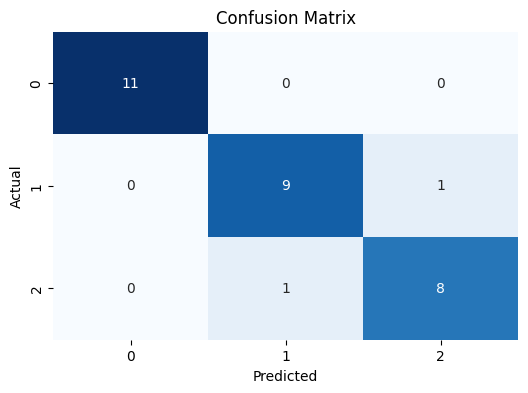

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree


# Create and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



**Machine Learning Model:Random Forest Classifier**

In [141]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.93


### **Machine Learning Model:- Logistic Regression**

In [142]:
from sklearn.linear_model import LogisticRegression
# Create and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.93


## **Conclusion:**

Here i developed four machine learning models,they are given different accuracy's.
They are

*   **Support Vector Machine(SVM)** : 0.9666
*   **Decesion Tree** : 0.93


*   **Random Forest Classifier** : 0.93
*   **Logistic Regression** : 0.93

Finally,the best machine learning model is support vector machine because it has high accuracy.


